In [1]:
import json
import os
import numpy as np
from moviepy.editor import *
from moviepy import *

In [2]:
videos = os.listdir('C:\\Users\\user\\Desktop\\Input_films')

with open('input', 'w') as inputfile:
    for v in videos:
        if v.split('.')[-1] == 'mp4':
            inputfile.write(v+'\n')

In [3]:
%cd video-classification-3d-cnn-pytorch/
%pwd

C:\Users\user\Desktop\video-classification-3d-cnn-pytorch


'C:\\Users\\user\\Desktop\\video-classification-3d-cnn-pytorch'

In [4]:
!python main.py --input input --video_root ../input_films --output ../outputfeature.json --model resnet-34-kinetics-cpu.pth --mode feature --no_cuda

loading model resnet-34-kinetics-cpu.pth
../input_films\kind-of-work-girls-do.mp4
../input_films\miss-moneypenny.mp4


ffmpeg version 2023-11-13-git-67a2571a55-essentials_build-www.gyan.dev Copyright (c) 2000-2023 the FFmpeg developers
  built with gcc 12.2.0 (Rev10, Built by MSYS2 project)
  configuration: --enable-gpl --enable-version3 --enable-static --pkg-config=pkgconf --disable-w32threads --disable-autodetect --enable-fontconfig --enable-iconv --enable-gnutls --enable-libxml2 --enable-gmp --enable-bzlib --enable-lzma --enable-zlib --enable-libsrt --enable-libssh --enable-libzmq --enable-avisynth --enable-sdl2 --enable-libwebp --enable-libx264 --enable-libx265 --enable-libxvid --enable-libaom --enable-libopenjpeg --enable-libvpx --enable-mediafoundation --enable-libass --enable-libfreetype --enable-libfribidi --enable-libharfbuzz --enable-libvidstab --enable-libvmaf --enable-libzimg --enable-amf --enable-cuda-llvm --enable-cuvid --enable-ffnvcodec --enable-nvdec --enable-nvenc --enable-dxva2 --enable-d3d11va --enable-libvpl --enable-libgme --enable-libopenmpt --enable-libopencore-amrwb --enable-li

In [5]:
file = open('../outputfeature.json')
segments = json.load(file)

In [6]:
len(segments)

2

In [7]:
import numpy as np

In [8]:
for s in segments: print(s['video'])

kind-of-work-girls-do.mp4
miss-moneypenny.mp4


In [9]:
print(segments[0]['clips'][0].keys())

dict_keys(['segment', 'features'])


In [10]:
kowgdFeatures = []
for s in segments[0]['clips']:
    kowgdFeatures.append(np.array(s['features']))  

In [11]:
print(len(kowgdFeatures))

13


In [12]:
print(len(kowgdFeatures[1]))

512


In [13]:
mmFeatures = []
for s in segments[1]['clips']:
    mmFeatures.append(np.array(s['features']))  

In [14]:
print(len(mmFeatures))

16


In [15]:
print(len(mmFeatures[1]))

512


In [16]:
bestRangeStart = 0
bestRangeScore = 100000000

for i in range(len(mmFeatures) - len(kowgdFeatures) + 1):
    distance = 0
    for j in range(len(kowgdFeatures)):
        if i + j < len(kowgdFeatures):
            d = np.linalg.norm(mmFeatures[i + j] - kowgdFeatures[j])
            distance += d
    print(distance)
    if distance < bestRangeScore:
        bestRangeScore = distance
        bestRangeStart = i

276.0485278111107
259.3917412055539
241.86922876799383
219.41106145645705


In [17]:
print(bestRangeStart)

3


In [18]:
MMVideo = VideoFileClip(r"C:\\Users\\user\\Desktop\\Input_films\\miss-moneypenny.mp4")
tsfps = MMVideo.fps
tsFrameLength = 1/tsfps

nrFrames = len(kowgdFeatures)*16
startFrame = bestRangeStart*16

startTime = startFrame*tsFrameLength
endTime = startTime+nrFrames*tsFrameLength

MMMatchedKOWGDVideo = MMVideo.subclip(startTime,endTime)

In [19]:
startTime

2.002

In [20]:
endTime

10.677333333333333

In [21]:
MMMatchedKOWGDVideo.ipython_display()

Moviepy - Building video __temp__.mp4.
MoviePy - Writing audio in __temp__TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video __temp__.mp4



Moviepy - Done !
Moviepy - video ready __temp__.mp4


In [23]:
MMMatchedKOWGDVideo.write_videofile("C:\\Users\\user\\Desktop\\output_films\\FeatureTest.mp4", codec='libx264', audio_codec='aac')

Moviepy - Building video C:\Users\user\Desktop\output_films\FeatureTest.mp4.
MoviePy - Writing audio in FeatureTestTEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video C:\Users\user\Desktop\output_films\FeatureTest.mp4



Moviepy - Done !
Moviepy - video ready C:\Users\user\Desktop\output_films\FeatureTest.mp4


In [24]:
MMMatchedKOWGDVideo.duration

8.675333333333334

In [25]:
frame = MMMatchedKOWGDVideo.get_frame(0.5)

In [26]:
from PIL import Image

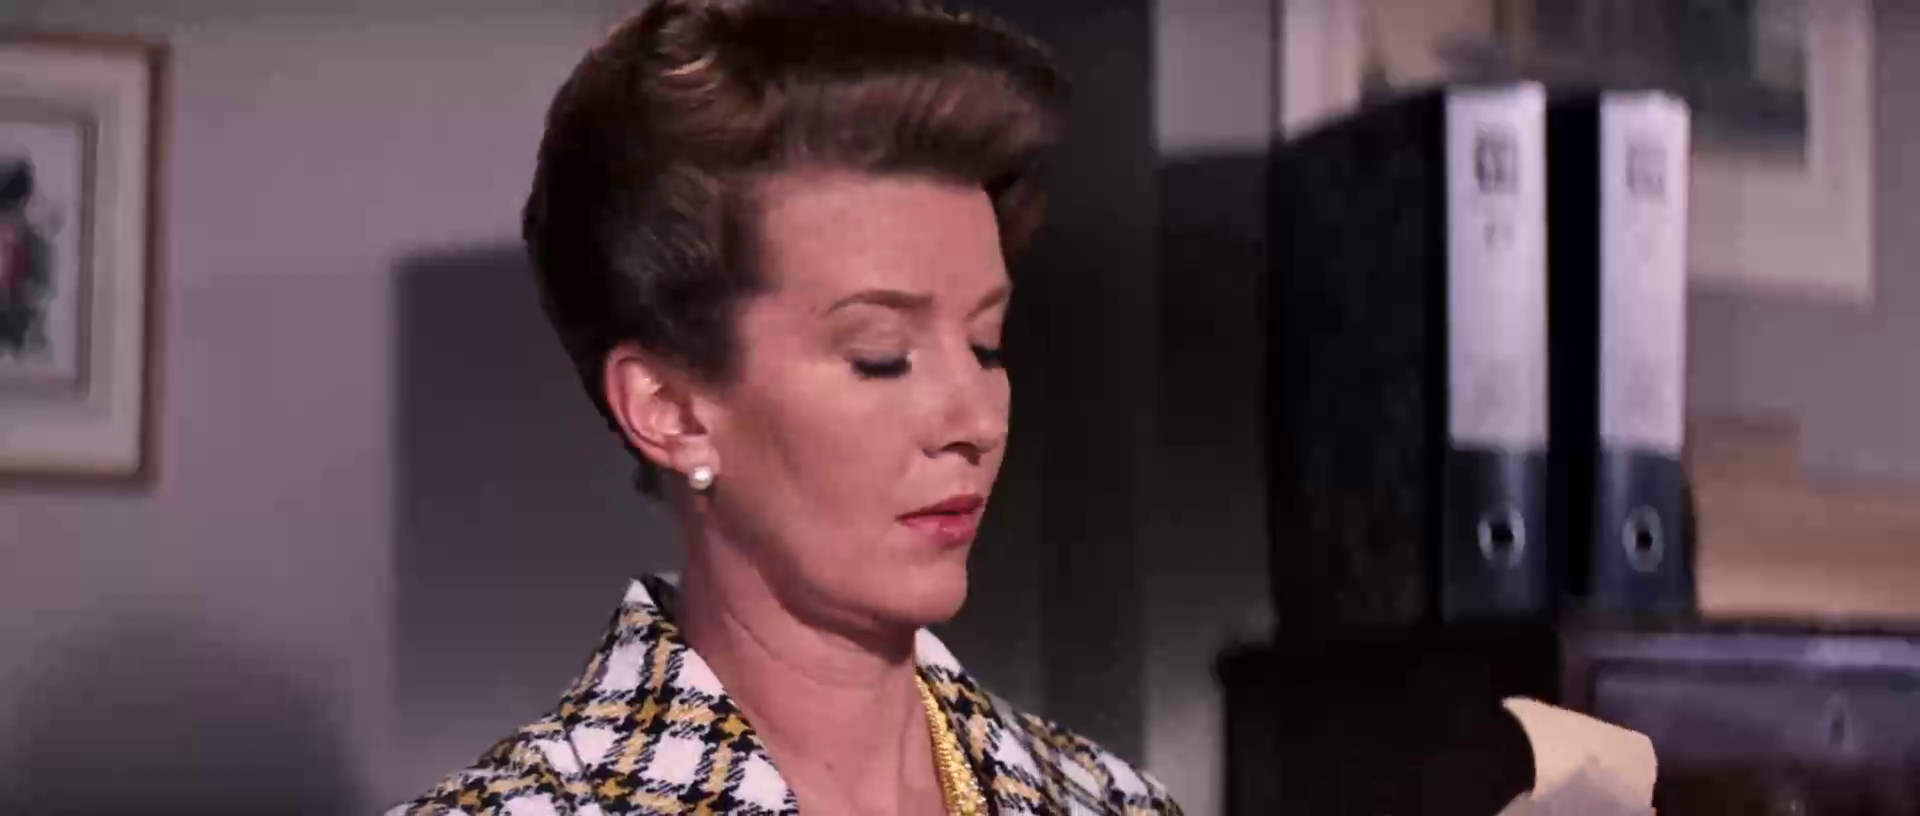

In [27]:
Image.fromarray(frame,'RGB')